# Bibliotecas

In [22]:
from systems import *
from power import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 3Bus

## Sistema Linearizado

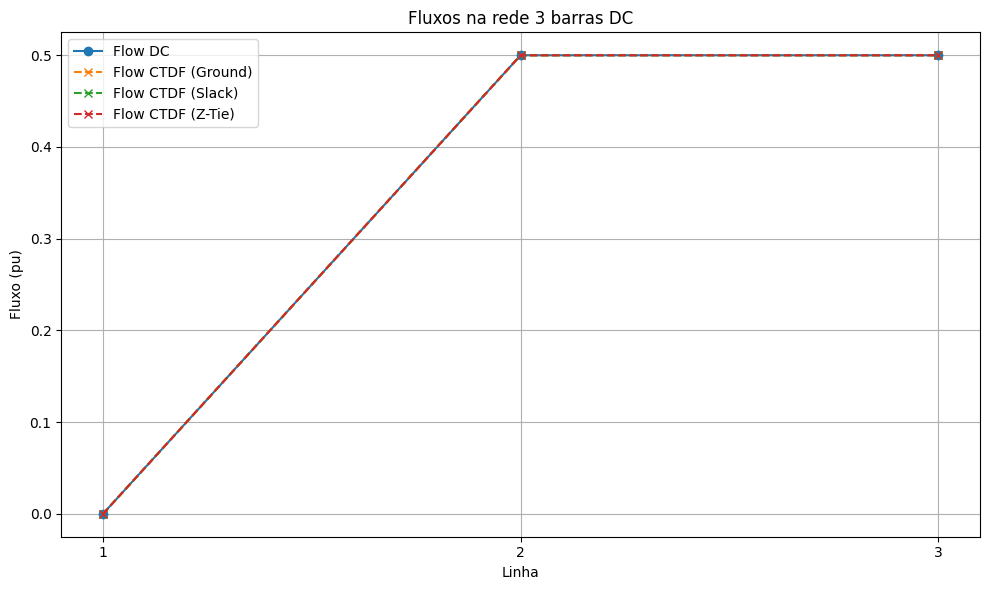

In [23]:
net = test3bus()
solver = DC_PF(net)
flow_dc = solver.solve()
flow_dc = solver.get_line_flows()

# Cálculo dos índices CTDF e flows
P = [net.buses[i].p for i in range(len(net.buses))]

#net = test3bus()
# CTDF ground:
T_ground = net.CTDF()
flow_ground = np.real(np.dot(T_ground, P))

# CTDF Slack ref:
T_slack = np.conjugate(net.CTDF(ref_bus=net.buses[0]))
flow_slack = np.real(np.dot(T_slack, P))

# CTDF z_tie:
T_tie = net.CTDF(ref_bus=net.buses[0], z_tie=1+1j)
flow_tie = np.real(np.dot(T_tie, P))

# Plotando os resultados
# Índice das barras (1, 2, 3, ...)
linhas = np.arange(1, len(net.lines) + 1)

plt.figure(figsize=(10, 6))
plt.plot(linhas, flow_dc, marker='o', label='Flow DC')
plt.plot(linhas, flow_ground, marker='x', linestyle='--', label='Flow CTDF (Ground)')
plt.plot(linhas, flow_slack, marker='x', linestyle='--', label='Flow CTDF (Slack)')
plt.plot(linhas, flow_tie, marker='x', linestyle='--', label='Flow CTDF (Z-Tie)')
plt.xlabel('Linha')
plt.ylabel('Fluxo (pu)')
plt.title('Fluxos na rede 3 barras DC')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(linhas)  # <-- Isso garante que o eixo x terá apenas inteiros
plt.savefig('images/fluxos_3bus_DC.png', dpi=300)  # Salva a imagem em PNG
plt.show()

## Sistema nao linear - Aumento de Carga em 10%

Converged in 4 iterations.
Converged in 4 iterations.


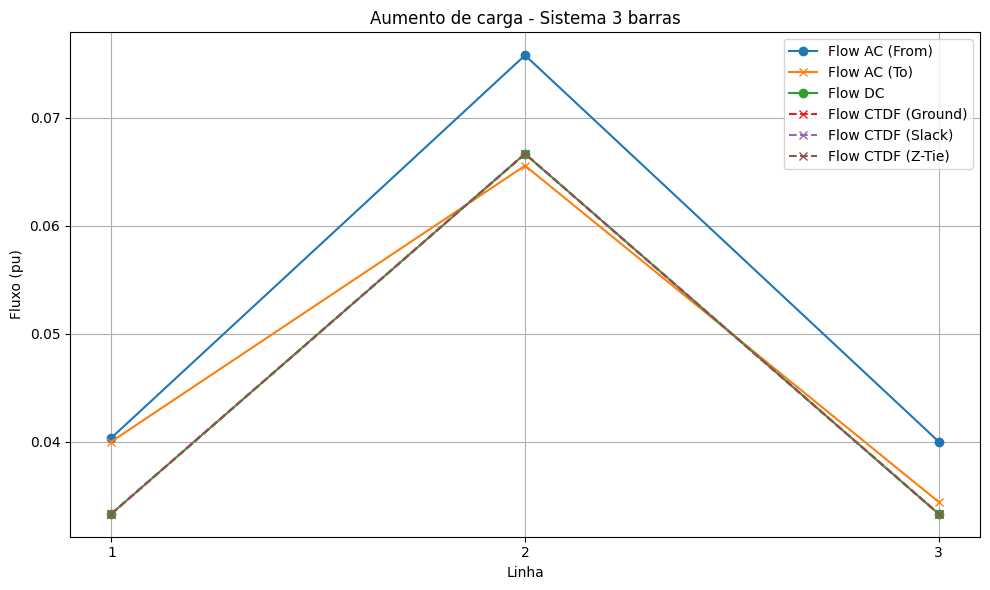

In [24]:
# Caso base
net = test3bus()
solver = AC_PF(net)
solver.solve()
theta_ac = solver.theta
flow_from, flow_to = solver.get_line_flows()
#AC
solver = DC_PF(net)
solver.solve()
flow_dc = solver.get_line_flows()


#Aumento de Carga
#AC Power Flow   
net = test3bus()
for load in net.loads:
    load.p_input = 1.1 * load.p_input  # Aumentando a carga em 10%
solver = AC_PF(net)
solver.solve()
theta_ac = solver.theta
flow_from_B, flow_to_B = solver.get_line_flows()
dflow_from  = flow_from_B - flow_from
dflow_to    = flow_to_B - flow_to
#DC Power Flow   
solver = DC_PF(net)
theta_dc = solver.solve()
flow_dc_B =  solver.get_line_flows()
dflow_dc = flow_dc_B - flow_dc


# Cálculo usando indices CTDF
net = test3bus()

P = np.zeros(len(net.buses))
for i, bus in enumerate(net.buses):
    if bus.bus_type == 'PQ':
        P[i] = 0.1 * bus.p  # 10% de aumento na carga ativa

# CTDF ground:
T_ground = np.conjugate(net.CTDF())
dflow_ground = np.real(np.dot(T_ground, P))

# CTDF Slack ref:
T_slack = np.conjugate(net.CTDF(ref_bus=net.buses[0]))
dflow_slack = np.real(np.dot(T_slack, P))

# CTDF z_tie:
T_tie = np.conjugate(net.CTDF(ref_bus=net.buses[0], z_tie=1 + 1j))
dflow_tie = np.real(np.dot(T_tie, P))

# Plotando os resultados
# Índice das barras (1, 2, 3, ...)
linhas = np.arange(1, len(net.lines) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(linhas, dflow_from, marker='o', label='Flow AC (From)')
plt.plot(linhas, -dflow_to, marker='x', label='Flow AC (To)')
plt.plot(linhas, dflow_dc, marker='o', label='Flow DC')
plt.plot(linhas, dflow_ground, marker='x', linestyle='--', label='Flow CTDF (Ground)')
plt.plot(linhas, dflow_slack, marker='x', linestyle='--', label='Flow CTDF (Slack)')
plt.plot(linhas, dflow_tie, marker='x', linestyle='--', label='Flow CTDF (Z-Tie)')
plt.xlabel('Linha')
plt.ylabel('Fluxo (pu)')
plt.title('Aumento de carga - Sistema 3 barras')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(linhas)  # <-- Isso garante que o eixo x terá apenas inteiros
plt.savefig('images/3bus_carga10%.png', dpi=300)

plt.show()

## Sistema não linear - Aumento de carga e geração em 10%

Converged in 4 iterations.
Converged in 4 iterations.


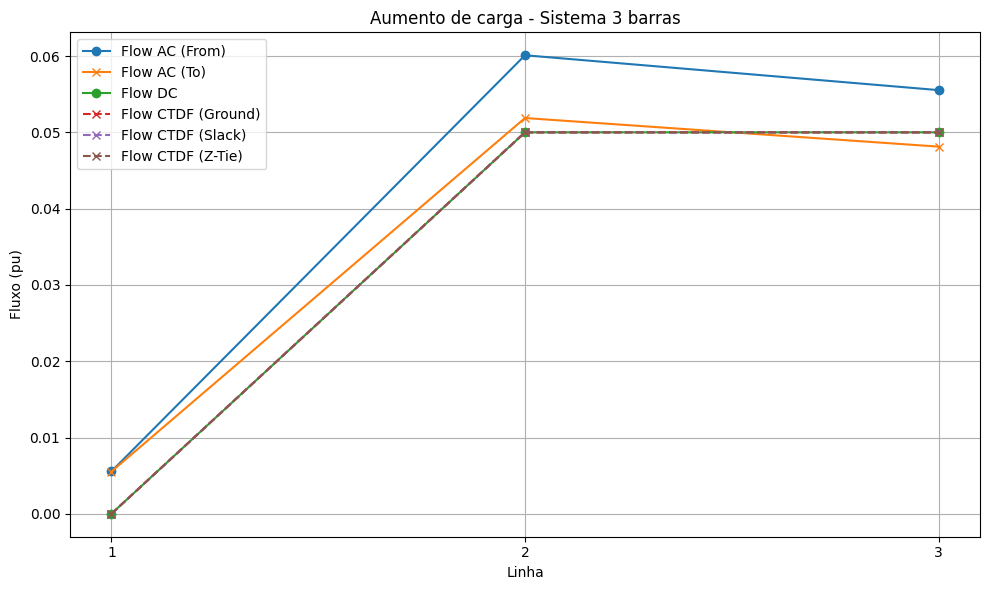

In [25]:
# Caso base
net = test3bus()
solver = AC_PF(net)
solver.solve()
theta_ac = solver.theta
flow_from, flow_to = solver.get_line_flows()
#AC
solver = DC_PF(net)
solver.solve()
flow_dc = solver.get_line_flows()


#AC Power Flow   
net = test3bus()
for load in net.loads:
    if load.bus.bus_type == 'PQ':
        load.p_input = 1.1 * load.p_input  # Aumentando a carga em 10%

for gen  in net.generators:
    if gen.bus.bus_type == 'PV':
        gen.p_input = 1.1 * gen.p_input  # Aumentando a geração em 10%

solver = AC_PF(net)
solver.solve()
theta_ac = solver.theta
flow_from_B, flow_to_B = solver.get_line_flows()
dflow_from  = flow_from_B - flow_from
dflow_to    = flow_to_B - flow_to
#DC Power Flow   
solver = DC_PF(net)
theta_dc = solver.solve()
flow_dc_B =  solver.get_line_flows()
dflow_dc = flow_dc_B - flow_dc


# Cálculo usando indices CTDF
net = test3bus()

P = np.zeros(len(net.buses))
for i, bus in enumerate(net.buses):
    if bus.bus_type == 'PQ':
        P[i] = 0.1 * bus.p  # 10% de aumento na carga ativa
    elif bus.bus_type == 'PV':
        P[i] = 0.1 * bus.p

# CTDF ground:
T_ground = np.conjugate(net.CTDF())
dflow_ground = np.real(np.dot(T_ground, P))

# CTDF Slack ref:
T_slack = np.conjugate(net.CTDF(ref_bus=net.buses[0]))
dflow_slack = np.real(np.dot(T_slack, P))

# CTDF z_tie:
T_tie = np.conjugate(net.CTDF(ref_bus=net.buses[0], z_tie=1 + 1j))
dflow_tie = np.real(np.dot(T_tie, P))

# Plotando os resultados
# Índice das barras (1, 2, 3, ...)
linhas = np.arange(1, len(net.lines) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(linhas, dflow_from, marker='o', label='Flow AC (From)')
plt.plot(linhas, -dflow_to, marker='x', label='Flow AC (To)')
plt.plot(linhas, dflow_dc, marker='o', label='Flow DC')
plt.plot(linhas, dflow_ground, marker='x', linestyle='--', label='Flow CTDF (Ground)')
plt.plot(linhas, dflow_slack, marker='x', linestyle='--', label='Flow CTDF (Slack)')
plt.plot(linhas, dflow_tie, marker='x', linestyle='--', label='Flow CTDF (Z-Tie)')
plt.xlabel('Linha')
plt.ylabel('Fluxo (pu)')
plt.title('Aumento de carga - Sistema 3 barras')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(linhas)  # <-- Isso garante que o eixo x terá apenas inteiros
plt.savefig('images/3_bus_cargaegeracao10%.png', dpi=300)

plt.show()

## Sistema Não linear - Aumento de carga com shunts de linha r=20%

Converged in 4 iterations.
Converged in 4 iterations.


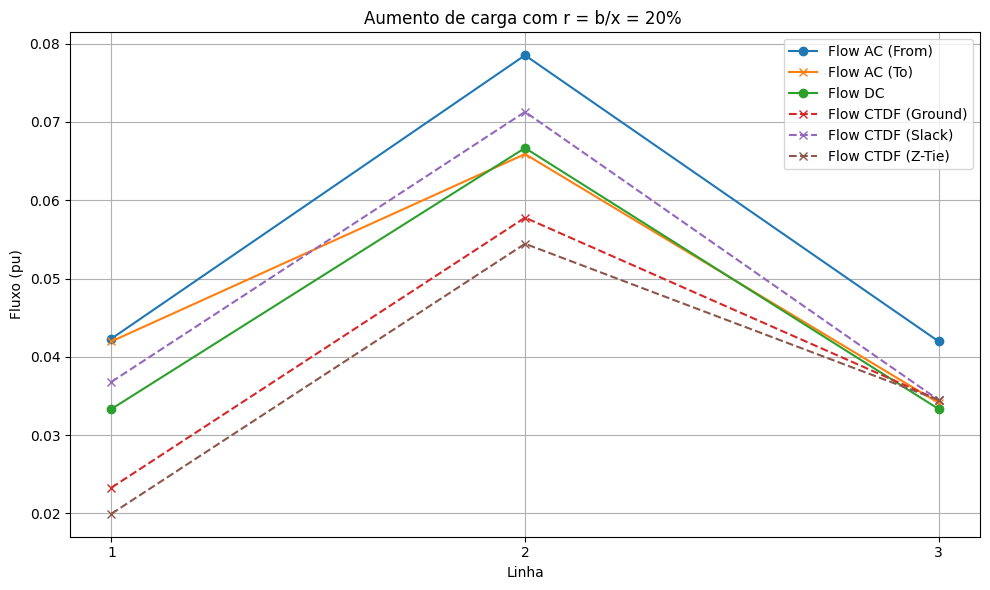

In [26]:
r = 0.2
# Caso base
net = test3bus()
for line in net.lines:
    line.b_half = r*line.x
solver = AC_PF(net)
solver.solve()
theta_ac = solver.theta
flow_from, flow_to = solver.get_line_flows()
#AC
solver = DC_PF(net)
solver.solve()
flow_dc = solver.get_line_flows()


#Aumento de Carga
net = test3bus()
for load in net.loads:
    load.p_input = 1.1 * load.p_input  # Aumentando a carga em 10%
solver = AC_PF(net)
solver.solve()
theta_ac = solver.theta
flow_from_B, flow_to_B = solver.get_line_flows()
dflow_from  = flow_from_B - flow_from
dflow_to    = flow_to_B - flow_to
#DC Power Flow  
solver = DC_PF(net)
theta_dc = solver.solve()
flow_dc_B =  solver.get_line_flows()
dflow_dc = flow_dc_B - flow_dc


# Cálculo usando indices CTDF
net = test3bus()
for line in net.lines:
    line.b_half = r*line.x

P = np.zeros(len(net.buses))
for i, bus in enumerate(net.buses):
    if bus.bus_type == 'PQ':
        P[i] = 0.1 * bus.p  # 10% de aumento na carga ativa

# CTDF ground:
T_ground = np.conjugate(net.CTDF())
dflow_ground = np.real(np.dot(T_ground, P))

# CTDF Slack ref:
T_slack = np.conjugate(net.CTDF(ref_bus=net.buses[0]))
dflow_slack = np.real(np.dot(T_slack, P))

# CTDF z_tie:
T_tie = np.conjugate(net.CTDF(ref_bus=net.buses[0], z_tie=1 + 1j))
dflow_tie = np.real(np.dot(T_tie, P))

# Plotando os resultados
# Índice das barras (1, 2, 3, ...)
linhas = np.arange(1, len(net.lines) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(linhas, dflow_from, marker='o', label='Flow AC (From)')
plt.plot(linhas, -dflow_to, marker='x', label='Flow AC (To)')
plt.plot(linhas, dflow_dc, marker='o', label='Flow DC')
plt.plot(linhas, dflow_ground, marker='x', linestyle='--', label='Flow CTDF (Ground)')
plt.plot(linhas, dflow_slack, marker='x', linestyle='--', label='Flow CTDF (Slack)')
plt.plot(linhas, dflow_tie, marker='x', linestyle='--', label='Flow CTDF (Z-Tie)')
plt.xlabel('Linha')
plt.ylabel('Fluxo (pu)')
plt.title('Aumento de carga com r = b/x = 20% ')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(linhas)  # <-- Isso garante que o eixo x terá apenas inteiros
plt.savefig('images/3bus_carga10%_r=20%.png', dpi=300)

plt.show()

# 6 Barras

## Aumento de Carga em 10%

Converged in 4 iterations.
Converged in 4 iterations.


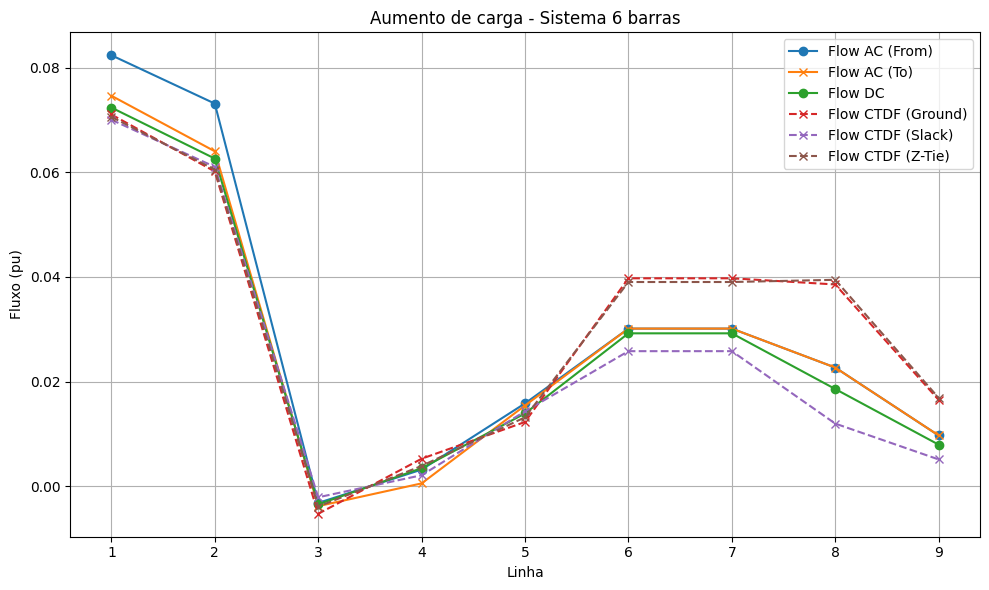

In [27]:
# Caso base
net = sauer6bus()
solver = AC_PF(net)
solver.solve()
theta_ac = solver.theta
flow_from, flow_to = solver.get_line_flows()
#AC
solver = DC_PF(net)
solver.solve()
flow_dc = solver.get_line_flows()


#Aumento de Carga
#AC Power Flow   
net = sauer6bus()
for load in net.loads:
    load.p_input = 1.1 * load.p_input  # Aumentando a carga em 10%
solver = AC_PF(net)
solver.solve()
theta_ac = solver.theta
flow_from_B, flow_to_B = solver.get_line_flows()
dflow_from  = flow_from_B - flow_from
dflow_to    = flow_to_B - flow_to
#DC Power Flow   
solver = DC_PF(net)
theta_dc = solver.solve()
flow_dc_B =  solver.get_line_flows()
dflow_dc = flow_dc_B - flow_dc


# Cálculo usando indices CTDF
net = sauer6bus()

P = np.zeros(len(net.buses))
for i, bus in enumerate(net.buses):
    if bus.bus_type == 'PQ':
        P[i] = 0.1 * bus.p  # 10% de aumento na carga ativa

# CTDF ground:
T_ground = np.conjugate(net.CTDF())
dflow_ground = np.real(np.dot(T_ground, P))

# CTDF Slack ref:
T_slack = np.conjugate(net.CTDF(ref_bus=net.buses[0]))
dflow_slack = np.real(np.dot(T_slack, P))

# CTDF z_tie:
T_tie = np.conjugate(net.CTDF(ref_bus=net.buses[0], z_tie=1+1j))
dflow_tie = np.real(np.dot(T_tie, P))

# Plotando os resultados
# Índice das barras (1, 2, 3, ...)
linhas = np.arange(1, len(net.lines) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(linhas, dflow_from, marker='o', label='Flow AC (From)')
plt.plot(linhas, -dflow_to, marker='x', label='Flow AC (To)')
plt.plot(linhas, dflow_dc, marker='o', label='Flow DC')
plt.plot(linhas, dflow_ground, marker='x', linestyle='--', label='Flow CTDF (Ground)')
plt.plot(linhas, dflow_slack, marker='x', linestyle='--', label='Flow CTDF (Slack)')
plt.plot(linhas, dflow_tie, marker='x', linestyle='--', label='Flow CTDF (Z-Tie)')
plt.xlabel('Linha')
plt.ylabel('Fluxo (pu)')
plt.title('Aumento de carga - Sistema 6 barras')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(linhas)  # <-- Isso garante que o eixo x terá apenas inteiros
plt.savefig('images/6bus_carga10%.png', dpi=300)

plt.show()